# Loading Path Planning Track Visualization

In [1]:
import numpy as np
import pandas as pd
from ast import literal_eval

in_file = '../data/logger.csv'
sample = pd.read_csv(in_file, sep=',')

sample.head()

,t,x,y,vd,xyd,nd,d,st
0,0,909.480,1128.67,0.000000,0.000000,6.0,6.16497,0
1,1,909.480,1128.77,0.007027,0.445000,6.0,6.02877,0
2,2,909.490,1128.77,0.009602,0.009602,6.0,6.06615,0
3,3,909.502,1128.77,0.012174,0.012173,6.0,6.06636,0
4,3,909.517,1128.77,0.014740,0.014740,6.0,6.06660,0


In [2]:
sample['xydsum'] = sample['xyd'] + sample['nd']
sample['mph'] = sample['xyd']*50.*2.23694
sample.describe()

,t,x,y,vd,xyd,nd,d,st,xydsum,mph
count,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000,16432.000000
mean,3725.126156,1276.168765,2065.774464,0.435246,0.435270,6.222310,6.198108,3.411940,6.657580,48.683619
std,2150.327947,765.505932,728.158919,0.037333,0.037213,3.200789,3.197271,22.255413,3.205994,4.162115
min,0.000000,155.452000,1128.670000,0.000000,0.000000,2.000000,-1.344540,0.000000,2.357925,0.000000
25%,1865.750000,519.355250,1224.350000,0.444887,0.444887,2.000000,2.387843,0.000000,2.445000,49.759276
50%,3729.000000,1253.605000,2071.015000,0.444999,0.444999,6.000000,6.061220,0.000000,6.444998,49.771803
75%,5589.000000,2085.062500,2892.435000,0.445000,0.445000,9.700000,9.571040,0.000000,10.144999,49.771915
max,7439.000000,2343.280000,3009.630000,0.445000,0.445000,9.700000,12.412100,223.000000,10.145000,49.771915


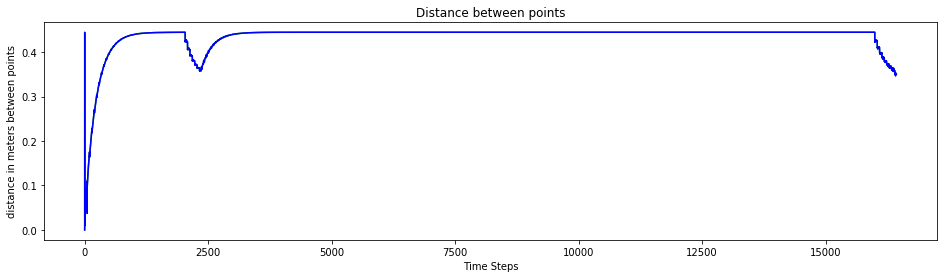

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
%matplotlib inline
sdistance = pd.Series(sample.vd)
xydistance = pd.Series(sample.xyd)
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 4))
p0 = ax1.plot(sdistance.index, sdistance, 'g', label='delta s')
p1 = ax1.plot(xydistance.index, xydistance, 'b', label='delta xy')
ax1.set_xlabel("Time Steps", fontsize=10)
ax1.set_ylabel("distance in meters between points", fontsize=10)
plt.title('Distance between points')
plt.show()

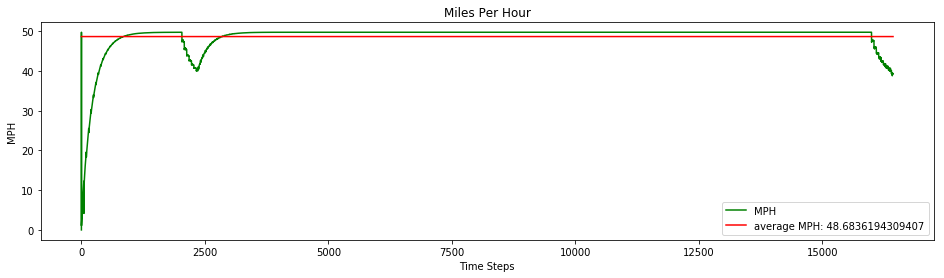

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
%matplotlib inline
mph = pd.Series(sample.mph)
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 4))
p0 = ax1.plot(mph.index, mph, 'g', label='MPH')
p1 = ax1.plot(mph.index, np.ones(mph.size)*mph.mean(), 'r', label='avg MPH={}'.format(mph.mean()))
ax1.set_xlabel("Time Steps", fontsize=10)
ax1.set_ylabel("MPH", fontsize=10)
plt.legend((p0[0],p1[0]), ('MPH', 'average MPH: {}'.format(mph.mean())))
plt.title('Miles Per Hour')
plt.show()

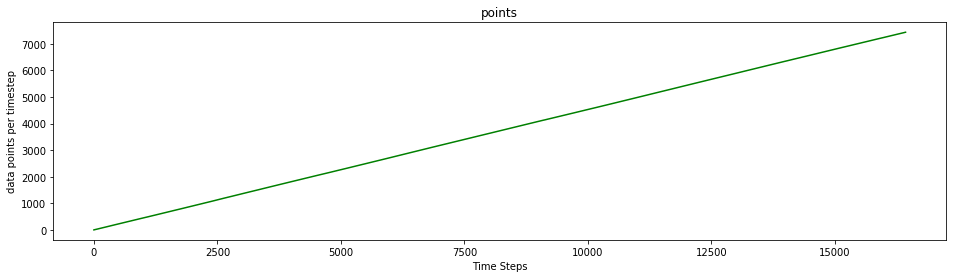

In [5]:
t = pd.Series(sample.t)
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 4))
p0 = ax1.plot(t.index, t, 'g', label='delta s')
#p1 = ax1.plot(xydistance.index, xydistance, 'b', label='delta xy')
ax1.set_xlabel("Time Steps", fontsize=10)
ax1.set_ylabel("data points per timestep", fontsize=10)
plt.title('points')
plt.show()

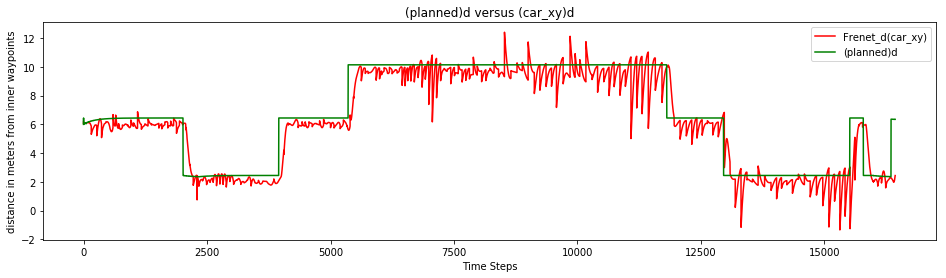

In [6]:
xyd = pd.Series(sample.xydsum)
sdd = pd.Series(sample.d)
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 4))
p0 = ax1.plot(sdd.index, sdd, 'r', label='(sd)d')
p1 = ax1.plot(xyd.index, xyd, 'g', label='(xy)d')
ax1.set_xlabel("Time Steps", fontsize=10)
ax1.set_ylabel("distance in meters from inner waypoints", fontsize=10)
plt.legend((p0[0],p1[0]), ('Frenet_d(car_xy)', '(planned)d'))
plt.title('(planned)d versus (car_xy)d')
plt.show()

In [7]:
waypoint_file = "../data/highway_map.csv"
logger_file = "../data/logger.csv"

with open(waypoint_file) as f:
    x_waypoint = []
    y_waypoint = []
    count = 0
    for line in f:
        if count > 0:
            data = line.split(' ')
            x_waypoint.append(data[0])
            y_waypoint.append(data[1])
        count += 1

with open(logger_file) as f:
    x_path = []
    y_path = []
    count = 0
    for line in f:
        if count > 0:
            data = line.split(',')
            x_path.append(data[1])
            y_path.append(data[2])
        count += 1

x_start = [ x_path[0] ]
y_start = [ y_path[0] ]

x_current = [ x_path[len(x_path)-1] ]
y_current = [ y_path[len(y_path)-1] ]

#ool_x = [ 328.124, 2209.2, 316.408, 313.927, 402.907, 392.723, 317.528, 317.035, 317.035, 322.769 ]
#ool_y = [ 2781.07, 2990.53, 2766.79, 2763.46, 2844.59, 2838.23, 2768.22, 2768.57, 2767.57, 2774.55 ]

#maxax = [ 965.836, 162.728 ]
#maxay = [ 2926.21, 2347.89 ]


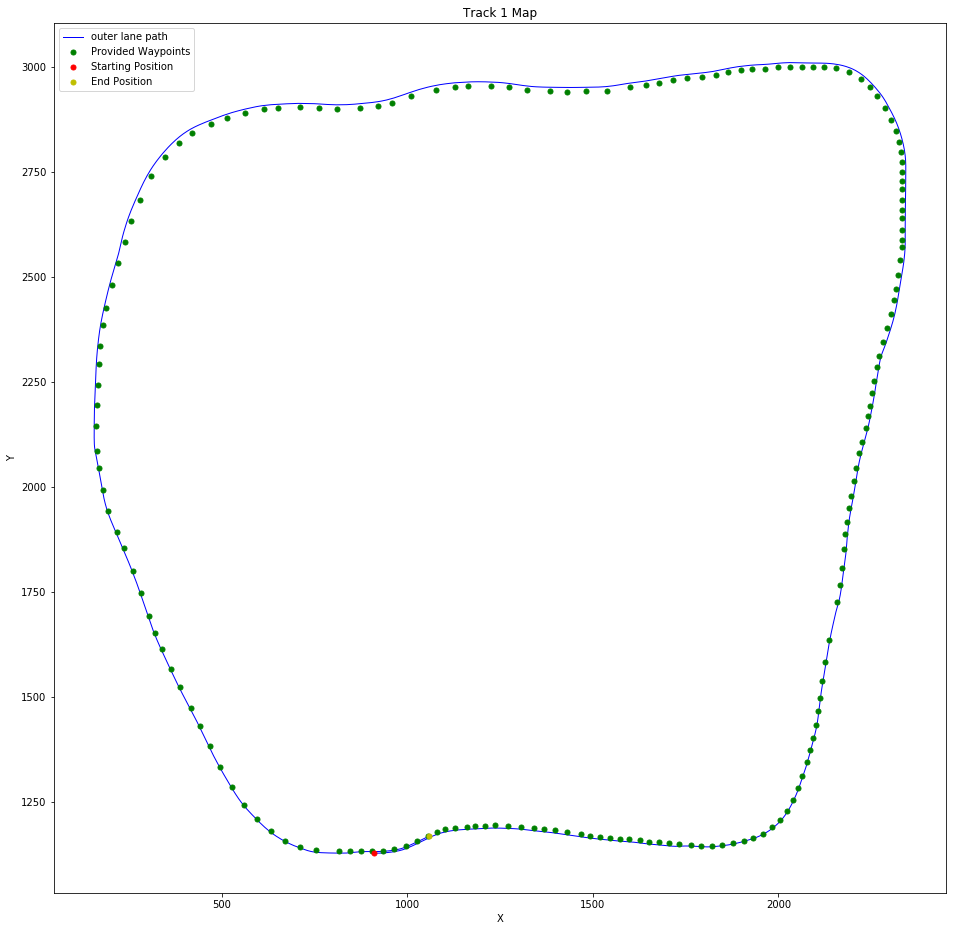

In [8]:
plt.rcParams["figure.figsize"] = [16, 16]
p1 = plt.plot(x_path, y_path, 'b', lw=1.0)
p2 = plt.plot(x_waypoint, y_waypoint, 'go', ms=5.0)
p3 = plt.plot(x_start, y_start, 'ro', ms=5.0)
p4 = plt.plot(x_current, y_current, 'yo', ms=5.0)
#p5 = plt.plot(ool_x, ool_y, 'rx', ms=15.0)
#p6 = plt.plot(maxax, maxay, 'bx', ms=15.0)
plt.title('Track 1 Map')
plt.xlabel("X", fontsize=10)
plt.ylabel("Y", fontsize=10)
#plt.legend((p1[0],p2[0], p3[0], p4[0], p5[0], p6[0]), ('outer lane path','Provided Waypoints', 'Starting Position','End Position', 'out of lane spots', 'max acceleration spots'))
plt.legend((p1[0],p2[0], p3[0], p4[0]), ('outer lane path','Provided Waypoints', 'Starting Position','End Position'))
plt.show()